# Load the Data


In [ ]:
!pip install -qqq easy-vqa
!pip install -qqq sentence_transformers transformer

ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [ ]:
from easy_vqa import get_train_questions, get_test_questions

train_questions, train_answers, train_image_ids = get_train_questions()
test_questions, test_answers, test_image_ids = get_test_questions()

In [ ]:
len(train_questions), len(test_questions)

(38575, 9673)

In [ ]:
# Find all the possible answers

from easy_vqa import get_answers

all_answers = get_answers()
all_answers

['circle',
 'green',
 'red',
 'gray',
 'yes',
 'teal',
 'black',
 'rectangle',
 'yellow',
 'triangle',
 'brown',
 'blue',
 'no']

# Visualize the Data

In [ ]:
# Verify the quesion, answers for Images

for idx in range(20):
  print('Question: ', train_questions[idx], end=', ')
  print('Answer: ', train_answers[idx], end=', ')
  print('Image Id: ', train_image_ids[idx])

Question:  what is the blue shape?, Answer:  rectangle, Image Id:  0
Question:  what color is the shape?, Answer:  blue, Image Id:  0
Question:  does the image contain a rectangle?, Answer:  yes, Image Id:  0
Question:  is there a triangle in the image?, Answer:  no, Image Id:  0
Question:  is there a black shape?, Answer:  no, Image Id:  0
Question:  does the image not contain a gray shape?, Answer:  yes, Image Id:  0
Question:  is there a red shape in the image?, Answer:  no, Image Id:  0
Question:  does the image not contain a red shape?, Answer:  yes, Image Id:  0
Question:  is there not a blue shape?, Answer:  no, Image Id:  0
Question:  is there not a blue shape in the image?, Answer:  no, Image Id:  0
Question:  is there not a yellow shape?, Answer:  yes, Image Id:  0
Question:  is a teal shape present?, Answer:  no, Image Id:  0
Question:  what color is the triangle?, Answer:  blue, Image Id:  1
Question:  what color is the shape?, Answer:  blue, Image Id:  1
Question:  is ther

In [ ]:
# write a function to display the image

def display_image(image_id):
  from IPython.display import Image
  from PIL import Image
  image_path = f"/usr/local/lib/python3.10/dist-packages/easy_vqa/data/train/images/{image_id}.png"
  display(Image.open(image_path))

In [ ]:
# Visualize the data

# Map questions for one particular image
from collections import defaultdict

image_qna_map = defaultdict(list)

for idx in range(len(train_questions)):
  image_qna_map[train_image_ids[idx]].append({'question': train_questions[idx], 'answer': train_answers[idx]})

Image Id:  0


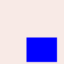

{'question': 'what is the blue shape?', 'answer': 'rectangle'}
{'question': 'what color is the shape?', 'answer': 'blue'}
{'question': 'does the image contain a rectangle?', 'answer': 'yes'}
{'question': 'is there a triangle in the image?', 'answer': 'no'}
{'question': 'is there a black shape?', 'answer': 'no'}
{'question': 'does the image not contain a gray shape?', 'answer': 'yes'}
{'question': 'is there a red shape in the image?', 'answer': 'no'}
{'question': 'does the image not contain a red shape?', 'answer': 'yes'}
{'question': 'is there not a blue shape?', 'answer': 'no'}
{'question': 'is there not a blue shape in the image?', 'answer': 'no'}
{'question': 'is there not a yellow shape?', 'answer': 'yes'}
{'question': 'is a teal shape present?', 'answer': 'no'}
Image Id:  1


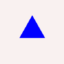

{'question': 'what color is the triangle?', 'answer': 'blue'}
{'question': 'what color is the shape?', 'answer': 'blue'}
{'question': 'is there not a rectangle in the image?', 'answer': 'yes'}
{'question': 'is there a red shape?', 'answer': 'no'}
{'question': 'is there a green shape in the image?', 'answer': 'no'}
{'question': 'is there not a teal shape?', 'answer': 'yes'}
Image Id:  2


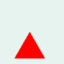

{'question': 'what shape is in the image?', 'answer': 'triangle'}
{'question': 'what shape does the image contain?', 'answer': 'triangle'}
{'question': 'what color is the triangle?', 'answer': 'red'}
{'question': 'what is the color of the triangle?', 'answer': 'red'}
{'question': 'is there a circle?', 'answer': 'no'}
{'question': 'does the image contain a green shape?', 'answer': 'no'}
{'question': 'is there a blue shape in the image?', 'answer': 'no'}
{'question': 'is there a teal shape?', 'answer': 'no'}
{'question': 'is there not a teal shape in the image?', 'answer': 'yes'}
Image Id:  3


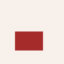

{'question': 'what shape is present?', 'answer': 'rectangle'}
{'question': 'what shape does the image contain?', 'answer': 'rectangle'}
{'question': 'what color is the rectangle?', 'answer': 'brown'}
{'question': 'what is the color of the rectangle?', 'answer': 'brown'}
{'question': 'what is the color of the shape?', 'answer': 'brown'}
{'question': 'does the image not contain a circle?', 'answer': 'yes'}
{'question': 'does the image contain a triangle?', 'answer': 'no'}
{'question': 'does the image contain a gray shape?', 'answer': 'no'}
{'question': 'is there a blue shape?', 'answer': 'no'}
{'question': 'is no yellow shape present?', 'answer': 'yes'}
{'question': 'is there not a brown shape?', 'answer': 'no'}
Image Id:  4


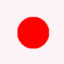

{'question': 'what is the red shape?', 'answer': 'circle'}
{'question': 'what is the color of the circle?', 'answer': 'red'}
{'question': 'what is the color of the shape?', 'answer': 'red'}
{'question': 'is there not a rectangle in the image?', 'answer': 'yes'}
{'question': 'is a circle present?', 'answer': 'yes'}
{'question': 'does the image not contain a circle?', 'answer': 'no'}
{'question': 'is there a black shape?', 'answer': 'no'}
{'question': 'is there not a gray shape?', 'answer': 'yes'}
{'question': 'does the image contain a red shape?', 'answer': 'yes'}
{'question': 'does the image contain a yellow shape?', 'answer': 'no'}
{'question': 'is there not a yellow shape in the image?', 'answer': 'yes'}
{'question': 'is there a teal shape?', 'answer': 'no'}
{'question': 'is there a brown shape in the image?', 'answer': 'no'}
{'question': 'is there not a brown shape in the image?', 'answer': 'yes'}
Image Id:  5


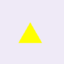

{'question': 'what is the yellow shape?', 'answer': 'triangle'}
{'question': 'what color is the triangle?', 'answer': 'yellow'}
{'question': 'what is the color of the triangle?', 'answer': 'yellow'}
{'question': 'is a rectangle present?', 'answer': 'no'}
{'question': 'is there not a circle?', 'answer': 'yes'}
{'question': 'is there a triangle?', 'answer': 'yes'}
{'question': 'is a green shape present?', 'answer': 'no'}
{'question': 'does the image contain a yellow shape?', 'answer': 'yes'}
{'question': 'is there a brown shape in the image?', 'answer': 'no'}
Image Id:  6


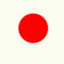

{'question': 'what is the red shape?', 'answer': 'circle'}
{'question': 'what is the color of the circle?', 'answer': 'red'}
{'question': 'what is the color of the shape?', 'answer': 'red'}
{'question': 'is no rectangle present?', 'answer': 'yes'}
{'question': 'does the image contain a circle?', 'answer': 'yes'}
{'question': 'is there not a circle?', 'answer': 'no'}
{'question': 'is there not a triangle in the image?', 'answer': 'yes'}
{'question': 'does the image not contain a gray shape?', 'answer': 'yes'}
{'question': 'is there a green shape?', 'answer': 'no'}
{'question': 'is there a blue shape?', 'answer': 'no'}
{'question': 'is a blue shape present?', 'answer': 'no'}
{'question': 'is a yellow shape present?', 'answer': 'no'}
{'question': 'is no teal shape present?', 'answer': 'yes'}
Image Id:  7


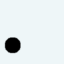

{'question': 'what is the color of the circle?', 'answer': 'black'}
{'question': 'is a rectangle present?', 'answer': 'no'}
{'question': 'is there not a triangle?', 'answer': 'yes'}
{'question': 'is there not a gray shape?', 'answer': 'yes'}
{'question': 'is there not a gray shape in the image?', 'answer': 'yes'}
{'question': 'is there a red shape?', 'answer': 'no'}
{'question': 'is there not a brown shape?', 'answer': 'yes'}
Image Id:  8


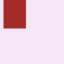

{'question': 'what is the color of the rectangle?', 'answer': 'brown'}
{'question': 'does the image not contain a circle?', 'answer': 'yes'}
{'question': 'is no gray shape present?', 'answer': 'yes'}
{'question': 'does the image contain a red shape?', 'answer': 'no'}
{'question': 'is no red shape present?', 'answer': 'yes'}
{'question': 'does the image not contain a green shape?', 'answer': 'yes'}
{'question': 'is there a blue shape in the image?', 'answer': 'no'}
{'question': 'does the image not contain a blue shape?', 'answer': 'yes'}
{'question': 'is there a teal shape in the image?', 'answer': 'no'}
{'question': 'is there a brown shape in the image?', 'answer': 'yes'}
Image Id:  9


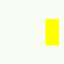

{'question': 'what shape is in the image?', 'answer': 'rectangle'}
{'question': 'what is the yellow shape?', 'answer': 'rectangle'}
{'question': 'what is the color of the rectangle?', 'answer': 'yellow'}
{'question': 'what color is the shape?', 'answer': 'yellow'}
{'question': 'is there a rectangle?', 'answer': 'yes'}
{'question': 'is a gray shape present?', 'answer': 'no'}
{'question': 'is a red shape present?', 'answer': 'no'}
{'question': 'is no red shape present?', 'answer': 'yes'}
{'question': 'does the image not contain a blue shape?', 'answer': 'yes'}
{'question': 'is there a brown shape?', 'answer': 'no'}
{'question': 'does the image not contain a brown shape?', 'answer': 'yes'}


In [ ]:
# Display Image and question-answers
for idx in range(10):
  print('Image Id: ', idx)
  display_image(idx)
  for qna in image_qna_map[idx]:
    print(qna)

In [ ]:
# Get index mapping for the answer labels
label2Index = {label: idx for idx, label in enumerate(all_answers)}
label2Index

{'circle': 0,
 'green': 1,
 'red': 2,
 'gray': 3,
 'yes': 4,
 'teal': 5,
 'black': 6,
 'rectangle': 7,
 'yellow': 8,
 'triangle': 9,
 'brown': 10,
 'blue': 11,
 'no': 12}

In [ ]:
# Get Label to Index mapping for the answer labels
index2Label = {idx: label for label, idx in label2Index.items()}
index2Label

{0: 'circle',
 1: 'green',
 2: 'red',
 3: 'gray',
 4: 'yes',
 5: 'teal',
 6: 'black',
 7: 'rectangle',
 8: 'yellow',
 9: 'triangle',
 10: 'brown',
 11: 'blue',
 12: 'no'}

# Preprocess the Data

In [ ]:
# Generate a Train dataframe

import pandas as pd

image_paths = [f"/usr/local/lib/python3.10/dist-packages/easy_vqa/data/train/images/{image_id}.png" for image_id in train_image_ids]
train_answer_labels = [label2Index[answer] for answer in train_answers]

train_df = pd.DataFrame({'question': train_questions, 'answer': train_answer_labels, 'image_path': image_paths})
train_df.head()

,question,answer,image_path
0,what is the blue shape?,7,/usr/local/lib/python3.10/dist-packages/easy_v...
1,what color is the shape?,11,/usr/local/lib/python3.10/dist-packages/easy_v...
2,does the image contain a rectangle?,4,/usr/local/lib/python3.10/dist-packages/easy_v...
3,is there a triangle in the image?,12,/usr/local/lib/python3.10/dist-packages/easy_v...
4,is there a black shape?,12,/usr/local/lib/python3.10/dist-packages/easy_v...


In [ ]:
# Generate a Test dataframe

import pandas as pd

image_paths = [f"/usr/local/lib/python3.10/dist-packages/easy_vqa/data/test/images/{image_id}.png" for image_id in test_image_ids]
test_answer_labels = [label2Index[answer] for answer in test_answers]

test_df = pd.DataFrame({'question': test_questions, 'answer': test_answer_labels, 'image_path': image_paths})
test_df.head()

,question,answer,image_path
0,what is the red shape?,9,/usr/local/lib/python3.10/dist-packages/easy_v...
1,what is the color of the triangle?,2,/usr/local/lib/python3.10/dist-packages/easy_v...
2,what is the color of the shape?,2,/usr/local/lib/python3.10/dist-packages/easy_v...
3,does the image contain a circle?,12,/usr/local/lib/python3.10/dist-packages/easy_v...
4,is there not a black shape in the image?,4,/usr/local/lib/python3.10/dist-packages/easy_v...


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_image_dir = "/usr/local/lib/python3.10/dist-packages/easy_vqa/data/train/images"

image_map = dict()

IMAGE_SHAPE = (64, 64)
BATCH_SIZE = 32

def load_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, IMAGE_SHAPE)
  image = tf.cast(image, tf.float32) / 255.0
  return image

train_images = []

for image_id in train_image_ids:
  if image_id not in image_map:
    image_path = os.path.join(train_image_dir, f"{image_id}.png")
    image = load_image(image_path)
    image_map[image_id] = image

  # Appending the arrays
  train_images.append(image_map[image_id]) # appending image array

train_images = np.array(train_images)
train_images.shape

(38575, 64, 64, 3)

In [ ]:
test_image_dir = "/usr/local/lib/python3.10/dist-packages/easy_vqa/data/test/images"

test_image_map = dict()

test_images = []

for image_id in test_image_ids:
  if image_id not in test_image_map:
    image_path = os.path.join(train_image_dir, f"{image_id}.png")
    image = load_image(image_path)
    test_image_map[image_id] = image

  # Appending the arrays
  test_images.append(test_image_map[image_id]) # appending image array

test_images = np.array(test_images)
test_images.shape

(9673, 64, 64, 3)

In [ ]:
train_questions = list(train_df['question'].values)

train_questions[:10]

['what is the blue shape?',
 'what color is the shape?',
 'does the image contain a rectangle?',
 'is there a triangle in the image?',
 'is there a black shape?',
 'does the image not contain a gray shape?',
 'is there a red shape in the image?',
 'does the image not contain a red shape?',
 'is there not a blue shape?',
 'is there not a blue shape in the image?']

In [ ]:
train_output_labels = train_df['answer'].values

train_output_labels[:10], list(map(lambda x: index2Label[x], train_output_labels))[:10]

(array([ 7, 11,  4, 12, 12,  4, 12,  4, 12, 12]),
 ['rectangle', 'blue', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no'])

In [ ]:
test_questions = list(test_df['question'].values)

test_questions[:10]

['what is the red shape?',
 'what is the color of the triangle?',
 'what is the color of the shape?',
 'does the image contain a circle?',
 'is there not a black shape in the image?',
 'does the image contain a green shape?',
 'is a green shape present?',
 'is there a blue shape in the image?',
 'is no blue shape present?',
 'is a yellow shape present?']

In [ ]:
test_output_labels = test_df['answer'].values

test_output_labels.shape

(9673,)

# Create the Model

- Resnet50 as the Image Feature Extraction Layer
- BertModel for Question Text Feature Extraction Layer

In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, GlobalAveragePooling2D, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from transformers import TFBertModel, BertTokenizer

### Preprocess text Input

In [ ]:
IMG_SHAPE = (64, 64, 3)
MAX_QUESTION_LENGTH = 30

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

encoded_input = tokenizer(train_questions, return_tensors='tf', padding="max_length", truncation=True, max_length=MAX_QUESTION_LENGTH)

encoded_input.input_ids.shape, encoded_input.attention_mask.shape

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(TensorShape([38575, 30]), TensorShape([38575, 30]))

In [ ]:
input_ids = encoded_input['input_ids']
attention_mask = encoded_input['attention_mask']

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow import keras
from tensorflow.keras.layers import Dense, Add, Softmax


class VQAModel(tf.keras.Model):
    def __init__(self, label_size, **kwargs):
        super(VQAModel, self).__init__(**kwargs)
        self.feature_dim = 512
        self.vocab_size = 30522  # BERT's vocabulary size
        self.label_size = label_size

        # Image processing layers
        self.resnet_model = ResNet50(include_top=False, weights='imagenet')
        self.resnet_model.trainable = False
        self.img_dense1 = Dense(1024, activation='relu')
        self.global_avg_pooling2d = GlobalAveragePooling2D()

        # Text processing layers
        self.bert_model = TFBertModel.from_pretrained('bert-base-uncased')
        self.global_avg_pooling1d = GlobalAveragePooling1D()
        self.dense_text1 = Dense(self.feature_dim, activation='relu')

        # Combine Image and Question Feature and Final Layers
        self.dropout1 = Dropout(0.3)
        self.dense1 = Dense(64, activation='relu')
        self.dropout2 = Dropout(0.3)
        self.dense2 = Dense(label_size, activation='softmax')

    def call(self, inputs):
        image, question, attention_masks = inputs

        image_features = self.resnet_model(image)
        x = self.global_avg_pooling2d(image_features)

        # Tokenize question texts
        question_features = self.bert_model(question, attention_mask=attention_masks)[0]
        y = self.global_avg_pooling1d(question_features)
        y = self.dense_text1(y)

        # Combine image and question features
        combined = Concatenate()([x, y])
        combined = self.dropout1(combined)
        combined = self.dense1(combined)
        combined = self.dropout2(combined)

        outputs = self.dense2(combined)
        return outputs


In [ ]:
num_classes = 13
model = VQAModel(label_size=num_classes)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Experiment data
num_samples = 29000
rest = len(train_images) - num_samples
print(rest)

# Image data
image_data = train_images[:num_samples]
validation_image_data = train_images[num_samples: num_samples+rest]

# Text data
encoded_questions_input_ids = encoded_input['input_ids'][:num_samples]
encoded_questions_attention_masks = encoded_input['attention_mask'][:num_samples]

# Validation data
val_encoded_questions_input_ids = encoded_input['input_ids'][num_samples: num_samples+rest]
val_encoded_questions_attention_masks = encoded_input['attention_mask'][num_samples: num_samples+rest]

9575


In [ ]:
# Experiment Labels

output_labels = train_output_labels[:num_samples]
validation_output_labels = train_output_labels[num_samples: num_samples+rest]

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
len(image_data), len(encoded_questions_input_ids), len(encoded_questions_attention_masks), len(output_labels)

(29000, 29000, 29000, 29000)

In [ ]:
len(validation_image_data), len(val_encoded_questions_input_ids), len(val_encoded_questions_attention_masks), len(validation_output_labels)

(9575, 9575, 9575, 9575)

In [ ]:
# Train the Model

history = model.fit([image_data, encoded_questions_input_ids, encoded_questions_attention_masks], output_labels,
                    validation_data=([validation_image_data, val_encoded_questions_input_ids, val_encoded_questions_attention_masks], validation_output_labels),
                    epochs=5,
                    batch_size=32,
                    callbacks=[callback])


Epoch 1/5


907/907 [==============================] - 177s 136ms/step - loss: 1.7581 - accuracy: 0.3625 - val_loss: 1.6586 - val_accuracy: 0.3678
Epoch 2/5
907/907 [==============================] - 112s 123ms/step - loss: 1.6855 - accuracy: 0.3684 - val_loss: 1.6232 - val_accuracy: 0.3678
Epoch 3/5
907/907 [==============================] - 112s 124ms/step - loss: 1.6580 - accuracy: 0.3714 - val_loss: 1.6053 - val_accuracy: 0.3697
Epoch 4/5
907/907 [==============================] - 113s 124ms/step - loss: 1.6359 - accuracy: 0.3672 - val_loss: 1.5904 - val_accuracy: 0.3646
Epoch 5/5
907/907 [==============================] - 113s 124ms/step - loss: 1.6241 - accuracy: 0.3704 - val_loss: 1.5748 - val_accuracy: 0.3709


#Inference

In [ ]:
test_encoded_questions = tokenizer(test_questions, return_tensors='tf', padding="max_length", truncation=True, max_length=MAX_QUESTION_LENGTH)

test_encoded_questions.input_ids.shape, test_encoded_questions.attention_mask.shape

(TensorShape([9673, 30]), TensorShape([9673, 30]))

In [ ]:
result = model.predict([test_images, test_encoded_questions.input_ids, test_encoded_questions.attention_mask])

303/303 [==============================] - 21s 41ms/step


In [ ]:
# Apply argmax to get the predicted class
predictions = np.argmax(result, axis=-1)

print(f"For {predictions.shape} test examples, Predicted Class: {predictions}")

For (9673,) test examples, Predicted Class: [12 12 12 ...  4  4  4]


In [ ]:
# Example true labels
true_labels = np.array(test_answer_labels) # Assuming one-hot encoded labels for 3 classes

# Calculate loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(true_labels, result).numpy()
print("Loss:", loss)

# Calculate accuracy
accuracy_fn = tf.keras.metrics.SparseCategoricalAccuracy()
accuracy_fn.update_state(true_labels, result)
accuracy = accuracy_fn.result().numpy()
print("Accuracy:", accuracy)

Loss: 1.8066238
Accuracy: 0.3739274


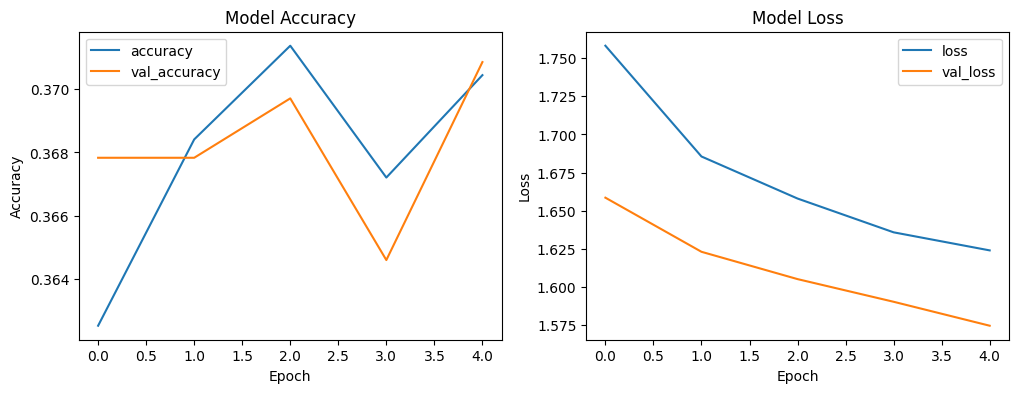

In [ ]:
# Plot accuracy and loss

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

In [ ]:
model.summary()

Model: "vqa_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 dense_3 (Dense)             multiple                  0 (unused)
                                                                 
 global_average_pooling2d_1  multiple                  0         
  (GlobalAveragePooling2D)                                       
                                                                 
 global_average_pooling1d_1  multiple                  0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             multiple                  393728    
                                                       